# Setup

In [79]:
import pandas as pd
import numpy as np
import string
!pip install -U scikit-multiflow
#resource for profanity: https://pypi.org/project/profanity-check/
!pip install alt-profanity-check
!pip install sklearn --upgrade
#resource for sentiment: https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
!pip install nltk
from profanity_check import predict
import nltk
nltk.download([
"names",
"stopwords",
"state_union",
"twitter_samples",
"movie_reviews",
"averaged_perceptron_tagger",
"vader_lexicon",
"punkt"])
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib
%matplotlib notebook
#from google.colab import drive
#drive.mount('/content/drive')

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

# Dataset Fixing and Modifying

In [80]:
#had to edit first row of csv file so that file was read with 3 columns and not 1
tweets = pd.read_csv("../hatespeech_text_label_vote_RESTRICTED_100K_v2.csv")
tweets

,Tweet text Label Votes for the majority label,Unnamed: 1,Unnamed: 2
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive,5
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal,3
99993,@LGUSAMobile why does my phone screen keeps fl...,normal,3
99994,#bigdata vs. #reality ... but equally applies ...,normal,5


In [81]:
#had to fix dataframe column names
tweets = tweets.rename(columns={"Tweet text  Label   Votes for the majority label": "Tweet text", "Unnamed: 1": "Label", "Unnamed: 2": "Votes for the majority label"})
#last column not needed
tweets.drop(tweets.columns[[2]], axis=1, inplace=True)
tweets

,Tweet text,Label
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [82]:
#"spam" labels not needed
tweets = tweets[tweets['Label'] != "spam"]
tweets

,Tweet text,Label
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
5,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [83]:
#check to make sure spam labels dropped
pd.unique(tweets['Label'])

array(['abusive', 'normal', 'hateful'], dtype=object)

# Tweet Feature Extraction And Data Cleaning/Processing

In [84]:
tweets["@ count"] = tweets['Tweet text'].str.count('@')
#Remove @'s from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')

tweets['Hashtag count'] = tweets['Tweet text'].str.count('#')
#Remove #'s from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('#[\S]*','')

tweets['Retweet'] = tweets['Tweet text'].str.contains('RT')
#Remove RT's from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('RT', '')

tweets['Url count'] = tweets['Tweet text'].str.count('http[\S]*')
#Remove URL's from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('http[\S]*','')

tweets['Uppercase word count'] = tweets['Tweet text'].apply(lambda x: sum(map(str.isupper, x.split())))

tweets['Num sentences'] = tweets['Tweet text'].apply(lambda x: len(nltk.sent_tokenize(x)))

tweets['temp'] = tweets['Tweet text'].apply(lambda x: nltk.sent_tokenize(x))
tweets['Avg sentence len'] = tweets['temp'].apply(lambda x: pd.Series(x).apply(lambda y: len(nltk.word_tokenize(y))).mean())
tweets.drop(tweets.columns[[8]], axis=1, inplace=True)

#Got rid of tweets with no text information after data cleaning/processing
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: x.isspace())
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[9]], axis=1, inplace=True)
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: len(x) == 0)
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[9]], axis=1, inplace=True)

<ipython-input-84-c2e6dfa1edf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["@ count"] = tweets['Tweet text'].str.count('@')
<ipython-input-84-c2e6dfa1edf4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')
<ipython-input-84-c2e6dfa1edf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')
<ipython-input-84-c2e6d

<ipython-input-84-c2e6dfa1edf4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('RT', '')
<ipython-input-84-c2e6dfa1edf4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Url count'] = tweets['Tweet text'].str.count('http[\S]*')
<ipython-input-84-c2e6dfa1edf4>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('http[\S]*','')
<ipython-inp

In [85]:
sia = SentimentIntensityAnalyzer() #Sentiment is 'compound' value from -1 to 1
tweets['Sentiment'] = tweets['Tweet text'].apply(lambda x: sia.polarity_scores(x)['compound'])

#Create temperorary parts of speech column
from collections import Counter
tweets['temp'] = tweets['Tweet text'].apply(lambda x: nltk.pos_tag(x.split()))
tweets['temp'] = tweets['temp'].apply(lambda x: Counter(tag for word,tag in x))

#Counting all adjectives
tweets['Adjective count'] = tweets['temp'].apply(lambda x: x['JJ'])
tweets['Adjective count'] = tweets['Adjective count'] + tweets['temp'].apply(lambda x: x['JJR'])
tweets['Adjective count'] = tweets['Adjective count'] + tweets['temp'].apply(lambda x: x['JJS'])

#Counting all verbs
tweets['Verb count'] = tweets['temp'].apply(lambda x: x['VB'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBP'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBD'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBG'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBN'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBZ'])

#Counting all adverbs
tweets['Adverb count'] = tweets['temp'].apply(lambda x: x['RB'])
tweets['Adverb count'] = tweets['Adverb count'] + tweets['temp'].apply(lambda x: x['RBR'])
tweets['Adverb count'] = tweets['Adverb count'] + tweets['temp'].apply(lambda x: x['RBS'])

#Remove temperoary parts of speech column
tweets.drop(tweets.columns[[10]], axis=1, inplace=True)

#Remove punctuation from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^\w\s]', '')
#Remove numbers from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('\d', '')
#Remove non-letters from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^a-zA-Z]', ' ')

#Got rid of tweets with no text information after data cleaning/processing
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: x.isspace())
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[13]], axis=1, inplace=True)
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: len(x) == 0)
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[13]], axis=1, inplace=True)

tweets['Profanity count'] = tweets['Tweet text'].str.replace('\W', ' ').str.split()
tweets['Profanity count'] = tweets['Profanity count'].apply(lambda x: sum(predict(x)))

tweets['Avg word len'] = tweets['Tweet text'].apply(lambda x: sum(list(map(len,x.split()))) / len(x.split()))

<ipython-input-85-5cfc110e5f75>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^\w\s]', '')
<ipython-input-85-5cfc110e5f75>:33: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('\d', '')
<ipython-input-85-5cfc110e5f75>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^a-zA-Z]', ' ')
<ipython-input-85-5cfc110e5f75>:45: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Profanity count'] = tweets['Tweet text'].str.replace('\W', ' ').str.split()


In [86]:
tweets_copy = tweets.copy()

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,abusive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,abusive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,abusive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


# Abusive/Hateful (A/H) Data Preparation For Batch Models

In [87]:
tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,abusive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,abusive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,abusive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [88]:
from sklearn import preprocessing

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [89]:
tweets.drop(tweets.columns[[0]], axis=1, inplace=True)
category = encode_text_index(tweets, "Label")
#'abusive' tweets label = 0
#'hateful' tweets label = 1
#'normal' tweets label = 2
encode_numeric_zscore(tweets, "@ count")
encode_numeric_zscore(tweets, "Hashtag count")
encode_text_dummy(tweets, "Retweet")
encode_numeric_zscore(tweets, "Url count")
encode_numeric_zscore(tweets, "Uppercase word count")
encode_numeric_zscore(tweets, "Num sentences")
encode_numeric_zscore(tweets, "Adjective count")
encode_numeric_zscore(tweets, "Verb count")
encode_numeric_zscore(tweets, "Adverb count")
encode_numeric_zscore(tweets, "Profanity count")
encode_numeric_zscore(tweets, "Avg sentence len")
encode_numeric_zscore(tweets, "Avg word len")
tweets

,Label,@ count,Hashtag count,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len,Retweet-False,Retweet-True
1,0,0.220582,-0.392741,-1.026551,-0.402188,-0.632783,0.426530,0.1280,-0.067988,0.163446,-0.696501,0.327584,-0.207162,0,1
2,2,-0.700879,0.862444,0.558705,-0.008264,-0.632783,1.044533,0.0000,-0.965360,0.695128,2.521878,-0.712615,-1.184764,1,0
3,2,-0.700879,-0.392741,-1.026551,-0.402188,-0.632783,3.362042,0.0000,3.521502,2.821852,-0.696501,-0.712615,-0.843786,1,0
4,2,-0.700879,-0.392741,0.558705,-0.008264,1.782263,-1.118476,-0.1260,1.726757,-0.899916,-0.696501,-0.712615,0.242782,1,0
5,0,0.220582,-0.392741,-1.026551,-0.008264,-0.632783,0.426530,-0.8689,-0.965360,-0.368235,0.376292,2.407981,0.314582,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0,0.220582,-0.392741,0.558705,-0.402188,-0.632783,-1.581978,0.0000,-0.965360,-1.431597,-0.696501,0.327584,0.194916,0,1
99992,2,-0.700879,1.490037,2.143961,-0.402188,-0.632783,-0.963975,0.0000,-0.965360,-0.899916,-0.696501,-0.712615,0.731020,1,0
99993,2,0.220582,2.117630,-1.026551,-0.402188,-0.632783,2.435038,-0.9430,2.624130,0.695128,1.449085,0.327584,-0.900490,1,0
99994,2,-0.700879,1.490037,2.143961,-0.402188,-0.632783,-0.809475,0.0000,-0.965360,-1.431597,0.376292,-0.712615,-0.044416,1,0


# A/H Batch Model Creation

In [90]:
#split into 10 days of data based on original data collection time frame
tweets_10_day_split = np.array_split(tweets, 10)
day1_tweets = tweets_10_day_split[0]
day2_tweets = tweets_10_day_split[1]
day3_tweets = tweets_10_day_split[2]
day4_tweets = tweets_10_day_split[3]
day5_tweets = tweets_10_day_split[4]
day6_tweets = tweets_10_day_split[5]
day7_tweets = tweets_10_day_split[6]
day8_tweets = tweets_10_day_split[7]
day9_tweets = tweets_10_day_split[8]
day10_tweets = tweets_10_day_split[9]

In [91]:
%pip install transformers
%pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-TinyBERT-L6-v2')
tweets_enum = model.encode(tweets_copy['Tweet text'].values)

#split into 10 days of data based on original data collection time frame
tweet_text_10_day_split = np.array_split(tweets_enum, 10)
day1_tweet_text = tweet_text_10_day_split[0]
day2_tweet_text = tweet_text_10_day_split[1]
day3_tweet_text = tweet_text_10_day_split[2]
day4_tweet_text = tweet_text_10_day_split[3]
day5_tweet_text = tweet_text_10_day_split[4]
day6_tweet_text = tweet_text_10_day_split[5]
day7_tweet_text = tweet_text_10_day_split[6]
day8_tweet_text = tweet_text_10_day_split[7]
day9_tweet_text = tweet_text_10_day_split[8]
day10_tweet_text = tweet_text_10_day_split[9]

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [92]:
from collections.abc import Sequence
# Split into train/test
from sklearn.model_selection import train_test_split
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# A/H Decision Tree Train Five Days AND Test Five Days

In [94]:
#day 1 tweets training
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
x_day1,y_day1 = to_xy(day1_tweets,'Label')
clf = clf.fit(x_day1, y_day1)

In [95]:
#day 2 tweets testing
x_day2,y_day2 = to_xy(day2_tweets,'Label')
pred = clf.predict(x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2723
           1       0.16      0.18      0.17       513
           2       0.90      0.89      0.89      5340

    accuracy                           0.81      8576
   macro avg       0.61      0.61      0.61      8576
weighted avg       0.81      0.81      0.81      8576



In [96]:
#day 3 tweets training
x_day3,y_day3 = to_xy(day3_tweets,'Label')
clf = clf.fit(x_day3, y_day3)

In [97]:
#day 4 tweets testing
x_day4,y_day4 = to_xy(day4_tweets,'Label')
pred = clf.predict(x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day4, axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2741
           1       0.14      0.17      0.15       442
           2       0.90      0.89      0.89      5393

    accuracy                           0.81      8576
   macro avg       0.61      0.61      0.61      8576
weighted avg       0.82      0.81      0.82      8576



In [98]:
#day 5 tweets training
x_day5,y_day5 = to_xy(day5_tweets,'Label')
clf = clf.fit(x_day5,y_day5)

In [99]:
#day 6 tweets testing
x_day6,y_day6 = to_xy(day6_tweets,'Label')
pred = clf.predict(x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day6,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2674
           1       0.15      0.16      0.15       488
           2       0.89      0.89      0.89      5413

    accuracy                           0.81      8575
   macro avg       0.60      0.60      0.60      8575
weighted avg       0.81      0.81      0.81      8575



In [100]:
#day 7 tweets training
x_day7,y_day7 = to_xy(day7_tweets,'Label')
clf = clf.fit(x_day7,y_day7)

In [101]:
#day 8 tweets testing
x_day8,y_day8 = to_xy(day8_tweets,'Label')
pred = clf.predict(x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day8,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2719
           1       0.19      0.19      0.19       556
           2       0.89      0.89      0.89      5300

    accuracy                           0.81      8575
   macro avg       0.62      0.62      0.62      8575
weighted avg       0.81      0.81      0.81      8575



In [102]:
#day 9 tweets training
x_day9,y_day9 = to_xy(day9_tweets,'Label')
clf = clf.fit(x_day9,y_day9)

In [103]:
#day 10 tweets testing
x_day10,y_day10 = to_xy(day10_tweets,'Label')
pred = clf.predict(x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day10,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2739
           1       0.17      0.20      0.18       490
           2       0.90      0.89      0.89      5346

    accuracy                           0.81      8575
   macro avg       0.62      0.62      0.62      8575
weighted avg       0.82      0.81      0.82      8575



[[2130  250  359]
 [ 215   96  179]
 [ 386  203 4757]]


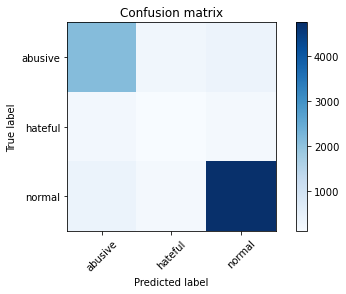

In [104]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# A/H Decision Tree Train One Day AND Test The Rest

In [105]:
#day 1 tweets training
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
x_day1,y_day1 = to_xy(day1_tweets,'Label')
clf = clf.fit(x_day1, y_day1)

In [106]:
#day 2 tweets testing
x_day2,y_day2 = to_xy(day2_tweets,'Label')
pred = clf.predict(x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2723
           1       0.15      0.17      0.16       513
           2       0.89      0.89      0.89      5340

    accuracy                           0.80      8576
   macro avg       0.60      0.60      0.60      8576
weighted avg       0.81      0.80      0.81      8576



In [107]:
#day 3 tweets testing
x_day3,y_day3 = to_xy(day3_tweets,'Label')
pred = clf.predict(x_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day3,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2741
           1       0.15      0.17      0.16       478
           2       0.90      0.88      0.89      5357

    accuracy                           0.81      8576
   macro avg       0.61      0.61      0.61      8576
weighted avg       0.82      0.81      0.81      8576



In [108]:
#day 4 tweets testing
x_day4,y_day4 = to_xy(day4_tweets,'Label')
pred = clf.predict(x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day4,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      2741
           1       0.15      0.19      0.17       442
           2       0.90      0.89      0.90      5393

    accuracy                           0.82      8576
   macro avg       0.61      0.62      0.61      8576
weighted avg       0.83      0.82      0.82      8576



In [109]:
#day 5 tweets testing
x_day5,y_day5 = to_xy(day5_tweets,'Label')
pred = clf.predict(x_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day5,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2774
           1       0.17      0.19      0.18       508
           2       0.91      0.89      0.90      5293

    accuracy                           0.82      8575
   macro avg       0.62      0.62      0.62      8575
weighted avg       0.82      0.82      0.82      8575



In [110]:
#day 6 tweets testing
x_day6,y_day6 = to_xy(day6_tweets,'Label')
pred = clf.predict(x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day6,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2674
           1       0.16      0.19      0.17       488
           2       0.90      0.89      0.89      5413

    accuracy                           0.81      8575
   macro avg       0.61      0.61      0.61      8575
weighted avg       0.82      0.81      0.81      8575



In [111]:
#day 7 tweets testing
x_day7,y_day7 = to_xy(day7_tweets,'Label')
pred = clf.predict(x_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day7,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2651
           1       0.15      0.17      0.16       489
           2       0.90      0.89      0.90      5435

    accuracy                           0.81      8575
   macro avg       0.61      0.61      0.61      8575
weighted avg       0.82      0.81      0.82      8575



In [112]:
#day 8 tweets testing
x_day8,y_day8 = to_xy(day8_tweets,'Label')
pred = clf.predict(x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day8,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2719
           1       0.19      0.21      0.20       556
           2       0.90      0.89      0.90      5300

    accuracy                           0.81      8575
   macro avg       0.62      0.62      0.62      8575
weighted avg       0.81      0.81      0.81      8575



In [113]:
#day 9 tweets testing
x_day9,y_day9 = to_xy(day9_tweets,'Label')
pred = clf.predict(x_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day9,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2683
           1       0.15      0.16      0.15       492
           2       0.90      0.89      0.90      5400

    accuracy                           0.82      8575
   macro avg       0.61      0.61      0.61      8575
weighted avg       0.82      0.82      0.82      8575



In [114]:
#day 10 tweets testing
x_day10,y_day10 = to_xy(day10_tweets,'Label')
pred = clf.predict(x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day10,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      2739
           1       0.16      0.18      0.17       490
           2       0.89      0.90      0.89      5346

    accuracy                           0.81      8575
   macro avg       0.61      0.61      0.61      8575
weighted avg       0.82      0.81      0.81      8575



[[2089  253  397]
 [ 218   90  182]
 [ 344  210 4792]]


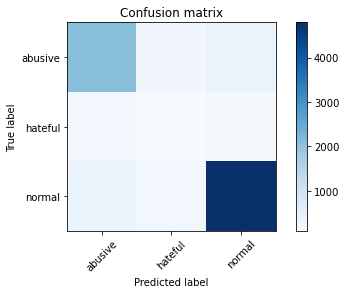

In [115]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# A/H Random Forest Train Five Days AND Test Five Days

In [116]:
#day 1 tweets training
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(verbose = 2, warm_start = True)
rfc = rfc.fit(x_day1,y_day1)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89

In [117]:
#day 2 tweets testing
pred = rfc.predict(x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2723
           1       0.60      0.06      0.12       513
           2       0.93      0.93      0.93      5340

    accuracy                           0.87      8576
   macro avg       0.77      0.63      0.63      8576
weighted avg       0.86      0.87      0.85      8576



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [118]:
#day 3 tweets training
rfc = rfc.fit(x_day3,y_day3)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [119]:
#day 4 tweets testing
pred = rfc.predict(x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day4,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2741
           1       0.68      0.08      0.14       442
           2       0.94      0.93      0.93      5393

    accuracy                           0.88      8576
   macro avg       0.80      0.64      0.64      8576
weighted avg       0.88      0.88      0.87      8576



In [120]:
#day 5 tweets training
rfc = rfc.fit(x_day5,y_day5)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [121]:
#day 6 tweets testing
pred = rfc.predict(x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day6,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2674
           1       0.71      0.06      0.11       488
           2       0.93      0.93      0.93      5413

    accuracy                           0.87      8575
   macro avg       0.80      0.63      0.63      8575
weighted avg       0.87      0.87      0.85      8575



In [122]:
#day 7 tweets training
rfc = rfc.fit(x_day7,y_day7)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [123]:
#day 8 tweets testing
pred = rfc.predict(x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day8,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2719
           1       0.70      0.09      0.16       556
           2       0.93      0.93      0.93      5300

    accuracy                           0.87      8575
   macro avg       0.80      0.64      0.64      8575
weighted avg       0.87      0.87      0.85      8575



In [124]:
#day 9 tweets training
rfc = rfc.fit(x_day9,y_day9)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [125]:
#day 10 tweets testing
pred = rfc.predict(x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day10,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2739
           1       0.69      0.08      0.14       490
           2       0.93      0.93      0.93      5346

    accuracy                           0.88      8575
   macro avg       0.80      0.64      0.64      8575
weighted avg       0.87      0.88      0.86      8575



[[2507   17  215]
 [ 287   37  166]
 [ 371    0 4975]]


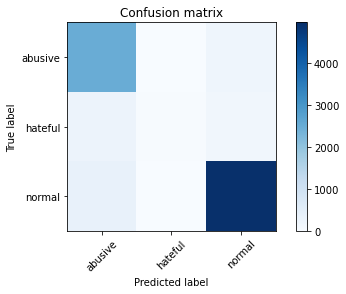

In [126]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# A/H Random Forest Train One Day And Test The Rest

In [127]:
#day 1 tweets training
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(verbose = 2, warm_start = True)
rfc = rfc.fit(x_day1,y_day1)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94

In [128]:
#day 2 tweets testing
pred = rfc.predict(x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2723
           1       0.59      0.06      0.11       513
           2       0.93      0.93      0.93      5340

    accuracy                           0.87      8576
   macro avg       0.77      0.63      0.63      8576
weighted avg       0.86      0.87      0.85      8576



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [129]:
#day 3 tweets testing
pred = rfc.predict(x_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day3,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2741
           1       0.65      0.05      0.09       478
           2       0.93      0.92      0.93      5357

    accuracy                           0.87      8576
   macro avg       0.79      0.63      0.62      8576
weighted avg       0.87      0.87      0.85      8576



In [130]:
#day 4 tweets testing
pred = rfc.predict(x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day4,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2741
           1       0.63      0.07      0.13       442
           2       0.94      0.93      0.94      5393

    accuracy                           0.88      8576
   macro avg       0.79      0.64      0.64      8576
weighted avg       0.88      0.88      0.87      8576



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [131]:
#day 5 tweets testing
pred = rfc.predict(x_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day5,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2774
           1       0.73      0.09      0.16       508
           2       0.94      0.93      0.93      5293

    accuracy                           0.88      8575
   macro avg       0.82      0.65      0.65      8575
weighted avg       0.88      0.88      0.86      8575



In [132]:
#day 6 tweets testing
pred = rfc.predict(x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day6,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2674
           1       0.64      0.06      0.11       488
           2       0.93      0.93      0.93      5413

    accuracy                           0.87      8575
   macro avg       0.78      0.63      0.62      8575
weighted avg       0.86      0.87      0.85      8575



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [133]:
#day 7 tweets testing
pred = rfc.predict(x_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day7,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2651
           1       0.67      0.08      0.14       489
           2       0.94      0.93      0.93      5435

    accuracy                           0.88      8575
   macro avg       0.80      0.64      0.64      8575
weighted avg       0.87      0.88      0.86      8575



In [134]:
#day 8 tweets testing
pred = rfc.predict(x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day8,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      2719
           1       0.65      0.09      0.15       556
           2       0.93      0.93      0.93      5300

    accuracy                           0.87      8575
   macro avg       0.78      0.64      0.64      8575
weighted avg       0.86      0.87      0.85      8575



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [135]:
#day 9 tweets testing
pred = rfc.predict(x_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day9,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2683
           1       0.79      0.06      0.11       492
           2       0.93      0.93      0.93      5400

    accuracy                           0.88      8575
   macro avg       0.84      0.64      0.63      8575
weighted avg       0.88      0.88      0.86      8575



In [136]:
#day 10 tweets testing
pred = rfc.predict(x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day10,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2739
           1       0.63      0.07      0.13       490
           2       0.93      0.93      0.93      5346

    accuracy                           0.88      8575
   macro avg       0.78      0.64      0.64      8575
weighted avg       0.87      0.88      0.86      8575



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


[[2503   21  215]
 [ 287   36  167]
 [ 372    0 4974]]


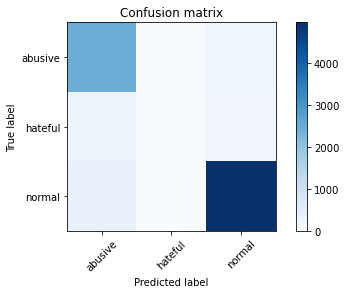

In [137]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# A/H Logistic Regression Train Five Days AND Test Five Days

In [138]:
# day 1 tweets training
from sklearn.linear_model import LogisticRegression
x_day1,y_day1 = to_xy(day1_tweets,'Label')
y_day1 = day1_tweets["Label"].values
lr = LogisticRegression(verbose = 2, warm_start = True)
lr = lr.fit(x_day1,y_day1)

In [139]:
#day 2 tweets testing
x_day2,y_day2 = to_xy(day2_tweets,'Label')
y_day2 = day2_tweets["Label"].values
pred = lr.predict(x_day2)
print(metrics.classification_report(y_day2, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2723
           1       0.00      0.00      0.00       513
           2       0.90      0.95      0.92      5340

    accuracy                           0.86      8576
   macro avg       0.57      0.60      0.58      8576
weighted avg       0.81      0.86      0.84      8576



In [140]:
#day 3 tweets training
x_day3,y_day3 = to_xy(day3_tweets,'Label')
y_day3 = day3_tweets["Label"].values
lr = lr.fit(x_day3,y_day3)

In [141]:
#day 4 tweets testing
x_day4,y_day4 = to_xy(day4_tweets,'Label')
y_day4 = day4_tweets["Label"].values
pred = lr.predict(x_day4)
print(metrics.classification_report(y_day4, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2741
           1       0.00      0.00      0.00       442
           2       0.91      0.95      0.93      5393

    accuracy                           0.88      8576
   macro avg       0.58      0.61      0.59      8576
weighted avg       0.83      0.88      0.86      8576



In [142]:
#day 5 tweets training
x_day5,y_day5 = to_xy(day5_tweets,'Label')
y_day5 = day5_tweets["Label"].values
lr = lr.fit(x_day5,y_day5)

In [143]:
#day 6 tweets testing
x_day6,y_day6 = to_xy(day6_tweets,'Label')
y_day6 = day6_tweets["Label"].values
pred = lr.predict(x_day6)
print(metrics.classification_report(y_day6, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2674
           1       0.50      0.00      0.01       488
           2       0.91      0.95      0.93      5413

    accuracy                           0.87      8575
   macro avg       0.73      0.61      0.59      8575
weighted avg       0.85      0.87      0.85      8575



In [144]:
#day 7 tweets training
x_day7,y_day7 = to_xy(day7_tweets,'Label')
y_day7 = day7_tweets["Label"].values
lr = lr.fit(x_day7,y_day7)

In [145]:
#day 8 tweets testing
x_day8,y_day8 = to_xy(day8_tweets,'Label')
y_day8 = day8_tweets["Label"].values
pred = lr.predict(x_day8)
print(metrics.classification_report(y_day8, pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2719
           1       0.00      0.00      0.00       556
           2       0.90      0.95      0.92      5300

    accuracy                           0.86      8575
   macro avg       0.56      0.61      0.58      8575
weighted avg       0.81      0.86      0.83      8575



In [146]:
#day 9 tweets training
x_day9,y_day9 = to_xy(day9_tweets,'Label')
y_day9 = day9_tweets["Label"].values
lr = lr.fit(x_day9,y_day9)

In [147]:
#day 10 tweets testing
x_day10,y_day10 = to_xy(day10_tweets,'Label')
y_day10 = day10_tweets["Label"].values
pred = lr.predict(x_day10)
print(metrics.classification_report(y_day10, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2739
           1       0.27      0.01      0.02       490
           2       0.91      0.95      0.93      5346

    accuracy                           0.87      8575
   macro avg       0.66      0.61      0.60      8575
weighted avg       0.84      0.87      0.85      8575



[[2394   10  335]
 [ 287    4  199]
 [ 250    1 5095]]


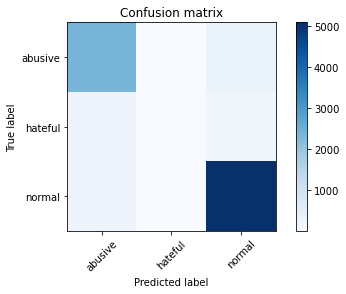

In [148]:
# Compute confusion matrix
cm = confusion_matrix(y_day10, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# A/H Logistic Regression Train One Day AND Test The Rest

In [149]:
# day 1 tweets training
from sklearn.linear_model import LogisticRegression
x_day1,y_day1 = to_xy(day1_tweets,'Label')
y_day1 = day1_tweets["Label"].values
lr = LogisticRegression(verbose = 2, warm_start = True)
lr = lr.fit(x_day1,y_day1)

In [150]:
#day 2 tweets testing
x_day2,y_day2 = to_xy(day2_tweets,'Label')
y_day2 = day2_tweets["Label"].values
pred = lr.predict(x_day2)
print(metrics.classification_report(y_day2, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2723
           1       0.00      0.00      0.00       513
           2       0.90      0.95      0.92      5340

    accuracy                           0.86      8576
   macro avg       0.57      0.60      0.58      8576
weighted avg       0.81      0.86      0.84      8576



In [151]:
#day 3 tweets testing
x_day3,y_day3 = to_xy(day3_tweets,'Label')
y_day3 = day3_tweets["Label"].values
pred = lr.predict(x_day3)
print(metrics.classification_report(y_day3, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2741
           1       0.33      0.01      0.01       478
           2       0.90      0.94      0.92      5357

    accuracy                           0.87      8576
   macro avg       0.68      0.61      0.59      8576
weighted avg       0.84      0.87      0.84      8576



In [152]:
#day 4 tweets testing
x_day4,y_day4 = to_xy(day4_tweets,'Label')
y_day4 = day4_tweets["Label"].values
pred = lr.predict(x_day4)
print(metrics.classification_report(y_day4, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2741
           1       0.00      0.00      0.00       442
           2       0.91      0.95      0.93      5393

    accuracy                           0.88      8576
   macro avg       0.57      0.61      0.59      8576
weighted avg       0.83      0.88      0.85      8576



In [153]:
#day 5 tweets testing
x_day5,y_day5 = to_xy(day5_tweets,'Label')
y_day5 = day5_tweets["Label"].values
pred = lr.predict(x_day5)
print(metrics.classification_report(y_day5, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2774
           1       0.00      0.00      0.00       508
           2       0.91      0.95      0.93      5293

    accuracy                           0.87      8575
   macro avg       0.57      0.61      0.59      8575
weighted avg       0.82      0.87      0.85      8575



In [154]:
#day 6 tweets testing
x_day6,y_day6 = to_xy(day6_tweets,'Label')
y_day6 = day6_tweets["Label"].values
pred = lr.predict(x_day6)
print(metrics.classification_report(y_day6, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2674
           1       0.14      0.00      0.01       488
           2       0.90      0.95      0.93      5413

    accuracy                           0.87      8575
   macro avg       0.62      0.60      0.59      8575
weighted avg       0.83      0.87      0.84      8575



In [155]:
#day 7 tweets testing
x_day7,y_day7 = to_xy(day7_tweets,'Label')
y_day7 = day7_tweets["Label"].values
pred = lr.predict(x_day7)
print(metrics.classification_report(y_day7, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      2651
           1       0.00      0.00      0.00       489
           2       0.91      0.95      0.93      5435

    accuracy                           0.87      8575
   macro avg       0.57      0.61      0.59      8575
weighted avg       0.83      0.87      0.85      8575



In [156]:
#day 8 tweets testing
x_day8,y_day8 = to_xy(day8_tweets,'Label')
y_day8 = day8_tweets["Label"].values
pred = lr.predict(x_day8)
print(metrics.classification_report(y_day8, pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2719
           1       0.09      0.00      0.00       556
           2       0.90      0.95      0.92      5300

    accuracy                           0.86      8575
   macro avg       0.59      0.61      0.58      8575
weighted avg       0.81      0.86      0.83      8575



In [157]:
#day 9 tweets testing
x_day9,y_day9 = to_xy(day9_tweets,'Label')
y_day9 = day9_tweets["Label"].values
pred = lr.predict(x_day9)
print(metrics.classification_report(y_day9, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2683
           1       0.29      0.00      0.01       492
           2       0.91      0.95      0.93      5400

    accuracy                           0.87      8575
   macro avg       0.67      0.61      0.59      8575
weighted avg       0.84      0.87      0.85      8575



In [158]:
#day 10 tweets testing
x_day10,y_day10 = to_xy(day10_tweets,'Label')
y_day10 = day10_tweets["Label"].values
pred = lr.predict(x_day10)
print(metrics.classification_report(y_day10, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2739
           1       0.25      0.01      0.01       490
           2       0.90      0.95      0.93      5346

    accuracy                           0.87      8575
   macro avg       0.66      0.61      0.59      8575
weighted avg       0.84      0.87      0.85      8575



[[2390    7  342]
 [ 290    3  197]
 [ 266    2 5078]]


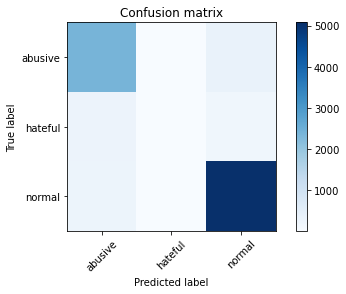

In [159]:
# Compute confusion matrix
cm = confusion_matrix(y_day10, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# Aggressive Tweets

In [160]:
#combine abusive and hateful tweets into aggressive for later comparison with other work
aggressive_tweets = tweets_copy
aggressive_tweets = aggressive_tweets.replace("abusive","aggressive")
aggressive_tweets = aggressive_tweets.replace("hateful","aggressive")
aggressive_tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,aggressive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,aggressive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,aggressive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [161]:
#check to make sure only aggressive and normal tweet labels exist
pd.unique(aggressive_tweets['Label'])

array(['aggressive', 'normal'], dtype=object)

# Agg Data Preparation For Models

In [162]:
aggressive_tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,aggressive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,aggressive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,aggressive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [163]:
aggressive_tweets.drop(aggressive_tweets.columns[[0]], axis=1, inplace=True)
category = encode_text_index(aggressive_tweets, "Label")
#'aggressive' tweets label = 0
#'normal' tweets label = 1
encode_numeric_zscore(aggressive_tweets, "@ count")
encode_numeric_zscore(aggressive_tweets, "Hashtag count")
encode_text_dummy(aggressive_tweets, "Retweet")
encode_numeric_zscore(aggressive_tweets, "Url count")
encode_numeric_zscore(aggressive_tweets, "Uppercase word count")
encode_numeric_zscore(aggressive_tweets, "Num sentences")
encode_numeric_zscore(aggressive_tweets, "Adjective count")
encode_numeric_zscore(aggressive_tweets, "Verb count")
encode_numeric_zscore(aggressive_tweets, "Adverb count")
encode_numeric_zscore(aggressive_tweets, "Profanity count")
encode_numeric_zscore(aggressive_tweets, "Avg sentence len")
encode_numeric_zscore(aggressive_tweets, "Avg word len")
aggressive_tweets

,Label,@ count,Hashtag count,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len,Retweet-False,Retweet-True
1,0,0.220582,-0.392741,-1.026551,-0.402188,-0.632783,0.426530,0.1280,-0.067988,0.163446,-0.696501,0.327584,-0.207162,0,1
2,1,-0.700879,0.862444,0.558705,-0.008264,-0.632783,1.044533,0.0000,-0.965360,0.695128,2.521878,-0.712615,-1.184764,1,0
3,1,-0.700879,-0.392741,-1.026551,-0.402188,-0.632783,3.362042,0.0000,3.521502,2.821852,-0.696501,-0.712615,-0.843786,1,0
4,1,-0.700879,-0.392741,0.558705,-0.008264,1.782263,-1.118476,-0.1260,1.726757,-0.899916,-0.696501,-0.712615,0.242782,1,0
5,0,0.220582,-0.392741,-1.026551,-0.008264,-0.632783,0.426530,-0.8689,-0.965360,-0.368235,0.376292,2.407981,0.314582,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0,0.220582,-0.392741,0.558705,-0.402188,-0.632783,-1.581978,0.0000,-0.965360,-1.431597,-0.696501,0.327584,0.194916,0,1
99992,1,-0.700879,1.490037,2.143961,-0.402188,-0.632783,-0.963975,0.0000,-0.965360,-0.899916,-0.696501,-0.712615,0.731020,1,0
99993,1,0.220582,2.117630,-1.026551,-0.402188,-0.632783,2.435038,-0.9430,2.624130,0.695128,1.449085,0.327584,-0.900490,1,0
99994,1,-0.700879,1.490037,2.143961,-0.402188,-0.632783,-0.809475,0.0000,-0.965360,-1.431597,0.376292,-0.712615,-0.044416,1,0


# Agg Batch Model Creation

In [164]:
#split into 10 days of data based on original data collection time frame
agg_tweets_10_day_split = np.array_split(aggressive_tweets, 10)
agg_day1_tweets = agg_tweets_10_day_split[0]
agg_day2_tweets = agg_tweets_10_day_split[1]
agg_day3_tweets = agg_tweets_10_day_split[2]
agg_day4_tweets = agg_tweets_10_day_split[3]
agg_day5_tweets = agg_tweets_10_day_split[4]
agg_day6_tweets = agg_tweets_10_day_split[5]
agg_day7_tweets = agg_tweets_10_day_split[6]
agg_day8_tweets = agg_tweets_10_day_split[7]
agg_day9_tweets = agg_tweets_10_day_split[8]
agg_day10_tweets = agg_tweets_10_day_split[9]

# Agg Decision Tree Train Five Days AND Test Five Days

In [165]:
#day 1 tweets training
agg_dtc = tree.DecisionTreeClassifier()
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day1, agg_y_day1)

In [166]:
#day 2 tweets testing
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
pred = agg_dtc.predict(agg_x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3236
           1       0.89      0.89      0.89      5340

    accuracy                           0.86      8576
   macro avg       0.85      0.85      0.85      8576
weighted avg       0.86      0.86      0.86      8576



In [167]:
#day 3 tweets training
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day3, agg_y_day3)

In [168]:
#day 4 tweets testing
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
pred = agg_dtc.predict(agg_x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day4,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3183
           1       0.90      0.89      0.89      5393

    accuracy                           0.87      8576
   macro avg       0.86      0.86      0.86      8576
weighted avg       0.87      0.87      0.87      8576



In [169]:
#day 5 tweets training
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day5, agg_y_day5)

In [170]:
#day 6 tweets testing
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
pred = agg_dtc.predict(agg_x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day6,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3162
           1       0.90      0.89      0.89      5413

    accuracy                           0.86      8575
   macro avg       0.85      0.86      0.86      8575
weighted avg       0.87      0.86      0.86      8575



In [171]:
#day 7 tweets training
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day7, agg_y_day7)

In [172]:
#day 8 tweets testing
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
pred = agg_dtc.predict(agg_x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day8,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3275
           1       0.89      0.89      0.89      5300

    accuracy                           0.87      8575
   macro avg       0.86      0.86      0.86      8575
weighted avg       0.87      0.87      0.87      8575



In [173]:
#day 9 tweets training
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day9, agg_y_day9)

In [174]:
#day 10 tweets testing
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
pred = agg_dtc.predict(agg_x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day10,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3229
           1       0.90      0.89      0.89      5346

    accuracy                           0.87      8575
   macro avg       0.86      0.86      0.86      8575
weighted avg       0.87      0.87      0.87      8575



[[2676  553]
 [ 588 4758]]


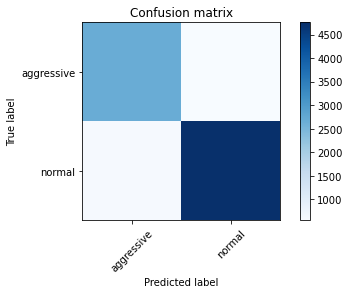

In [175]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# Agg Decision Tree Train One Day AND Test The Rest

In [176]:
#day 1 tweets training
agg_dtc = tree.DecisionTreeClassifier()
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day1, agg_y_day1)

In [177]:
#day 2 tweets testing
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
pred = agg_dtc.predict(agg_x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3236
           1       0.89      0.89      0.89      5340

    accuracy                           0.86      8576
   macro avg       0.86      0.85      0.85      8576
weighted avg       0.86      0.86      0.86      8576



In [178]:
#day 3 tweets testing
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
pred = agg_dtc.predict(agg_x_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day3,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3219
           1       0.90      0.88      0.89      5357

    accuracy                           0.86      8576
   macro avg       0.85      0.86      0.86      8576
weighted avg       0.87      0.86      0.86      8576



In [179]:
#day 4 tweets testing
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
pred = agg_dtc.predict(agg_x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day4,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3183
           1       0.89      0.89      0.89      5393

    accuracy                           0.87      8576
   macro avg       0.86      0.86      0.86      8576
weighted avg       0.87      0.87      0.87      8576



In [180]:
#day 5 tweets testing
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
pred = agg_dtc.predict(agg_x_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day5,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      3282
           1       0.90      0.89      0.89      5293

    accuracy                           0.87      8575
   macro avg       0.86      0.86      0.86      8575
weighted avg       0.87      0.87      0.87      8575



In [181]:
#day 6 tweets testing
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
pred = agg_dtc.predict(agg_x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day6,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3162
           1       0.89      0.88      0.89      5413

    accuracy                           0.86      8575
   macro avg       0.85      0.85      0.85      8575
weighted avg       0.86      0.86      0.86      8575



In [182]:
#day 7 tweets testing
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
pred = agg_dtc.predict(agg_x_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day7,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3140
           1       0.90      0.90      0.90      5435

    accuracy                           0.87      8575
   macro avg       0.86      0.86      0.86      8575
weighted avg       0.87      0.87      0.87      8575



In [183]:
#day 8 tweets testing
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
pred = agg_dtc.predict(agg_x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day8,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3275
           1       0.89      0.89      0.89      5300

    accuracy                           0.86      8575
   macro avg       0.86      0.86      0.86      8575
weighted avg       0.86      0.86      0.86      8575



In [184]:
#day 9 tweets testing
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
pred = agg_dtc.predict(agg_x_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day9,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3175
           1       0.90      0.89      0.90      5400

    accuracy                           0.87      8575
   macro avg       0.86      0.86      0.86      8575
weighted avg       0.87      0.87      0.87      8575



In [185]:
#day 10 tweets testing
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
pred = agg_dtc.predict(agg_x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day10,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3229
           1       0.89      0.89      0.89      5346

    accuracy                           0.87      8575
   macro avg       0.86      0.86      0.86      8575
weighted avg       0.87      0.87      0.87      8575



[[2658  571]
 [ 583 4763]]


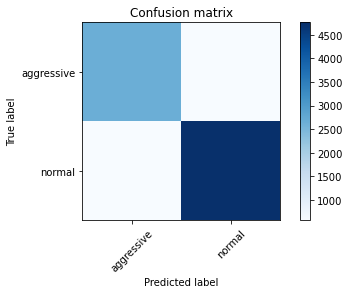

In [186]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# Agg Random Forest Train Five Days AND Test Five Days

In [187]:
#day 1 tweets training
agg_rfc = RandomForestClassifier(verbose = 2, warm_start = True)
agg_rfc = agg_rfc.fit(agg_x_day1, agg_y_day1)

building tree 1 of 100


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

In [188]:
#day 2 tweets testing
pred = agg_rfc.predict(agg_x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3236
           1       0.93      0.93      0.93      5340

    accuracy                           0.91      8576
   macro avg       0.91      0.91      0.91      8576
weighted avg       0.91      0.91      0.91      8576



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [189]:
#day 3 tweets training
agg_rfc = agg_rfc.fit(agg_x_day3, agg_y_day3)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [190]:
#day 4 tweets testing
pred = agg_rfc.predict(agg_x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day4,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3183
           1       0.94      0.93      0.94      5393

    accuracy                           0.92      8576
   macro avg       0.91      0.91      0.91      8576
weighted avg       0.92      0.92      0.92      8576



In [191]:
#day 5 tweets training
agg_rfc = agg_rfc.fit(agg_x_day5, agg_y_day5)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [192]:
#day 6 tweets testing
pred = agg_rfc.predict(agg_x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day6,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3162
           1       0.93      0.93      0.93      5413

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [193]:
#day 7 tweets training
agg_rfc = agg_rfc.fit(agg_x_day7, agg_y_day7)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [194]:
#day 8 tweets testing
pred = agg_rfc.predict(agg_x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day8,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3275
           1       0.93      0.93      0.93      5300

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [195]:
#day 9 tweets training
agg_rfc = agg_rfc.fit(agg_x_day9, agg_y_day9)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [196]:
#day 10 tweets testing
pred = agg_rfc.predict(agg_x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day10,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3229
           1       0.93      0.93      0.93      5346

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



[[2840  389]
 [ 356 4990]]


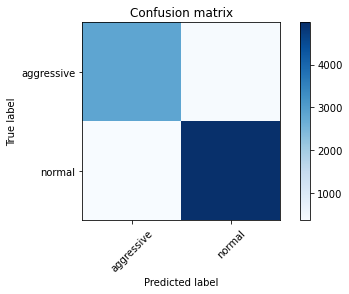

In [197]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# Agg Random Forest Train One Day AND Test The Rest

In [198]:
#day 1 tweets training
agg_rfc = RandomForestClassifier(verbose = 2, warm_start = True)
agg_rfc = agg_rfc.fit(agg_x_day1, agg_y_day1)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99

In [199]:
#day 3 tweets testing
pred = agg_rfc.predict(agg_x_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day3,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3219
           1       0.93      0.92      0.93      5357

    accuracy                           0.91      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.91      0.91      0.91      8576



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [200]:
#day 4 tweets testing
pred = agg_rfc.predict(agg_x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day4,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3183
           1       0.94      0.93      0.94      5393

    accuracy                           0.92      8576
   macro avg       0.91      0.92      0.91      8576
weighted avg       0.92      0.92      0.92      8576



In [201]:
#day 5 tweets testing
pred = agg_rfc.predict(agg_x_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day5,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3282
           1       0.94      0.93      0.94      5293

    accuracy                           0.92      8575
   macro avg       0.91      0.92      0.92      8575
weighted avg       0.92      0.92      0.92      8575



In [202]:
#day 6 tweets testing
pred = agg_rfc.predict(agg_x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day6,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3162
           1       0.93      0.93      0.93      5413

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [203]:
#day 7 tweets testing
pred = agg_rfc.predict(agg_x_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day7,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3140
           1       0.94      0.93      0.93      5435

    accuracy                           0.92      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.92      0.92      0.92      8575



In [204]:
#day 8 tweets testing
pred = agg_rfc.predict(agg_x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day8,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3275
           1       0.93      0.93      0.93      5300

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [205]:
#day 9 tweets testing
pred = agg_rfc.predict(agg_x_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day9,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3175
           1       0.93      0.93      0.93      5400

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [206]:
#day 10 tweets testing
pred = agg_rfc.predict(agg_x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day10,axis=1)
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3229
           1       0.93      0.93      0.93      5346

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



[[2835  394]
 [ 357 4989]]


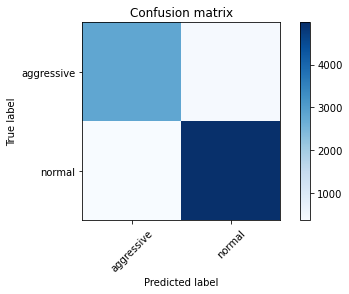

In [207]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# Agg Logistic Regression Train Five Days AND Test Five Days

In [208]:
#day 1 tweets training
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_y_day1 = agg_day1_tweets["Label"].values
agg_lr = LogisticRegression(verbose = 2, warm_start = True)
agg_lr = agg_lr.fit(agg_x_day1, agg_y_day1)

In [209]:
#day 2 tweets testing
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
agg_y_day2 = agg_day2_tweets["Label"].values
pred = agg_lr.predict(agg_x_day2)
print(metrics.classification_report(agg_y_day2, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3236
           1       0.92      0.94      0.93      5340

    accuracy                           0.91      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.91      0.91      0.91      8576



In [210]:
#day 3 tweets training
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
agg_y_day3 = agg_day3_tweets["Label"].values
agg_lr = agg_lr.fit(agg_x_day3, agg_y_day3)

In [211]:
#day 4 tweets testing
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
agg_y_day4 = agg_day4_tweets["Label"].values
pred = agg_lr.predict(agg_x_day4)
print(metrics.classification_report(agg_y_day4, pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3183
           1       0.93      0.94      0.93      5393

    accuracy                           0.92      8576
   macro avg       0.91      0.91      0.91      8576
weighted avg       0.92      0.92      0.92      8576



In [212]:
#day 5 tweets training
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
agg_y_day5 = agg_day5_tweets["Label"].values
agg_lr = agg_lr.fit(agg_x_day5, agg_y_day5)

In [213]:
#day 6 tweets testing
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
agg_y_day6 = agg_day6_tweets["Label"].values
pred = agg_lr.predict(agg_x_day6)
print(metrics.classification_report(agg_y_day6, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3162
           1       0.92      0.94      0.93      5413

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [214]:
#day 7 tweets training
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
agg_y_day7 = agg_day7_tweets["Label"].values
agg_lr = agg_lr.fit(agg_x_day7, agg_y_day7)

In [215]:
#day 8 tweets testing
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
agg_y_day8 = agg_day8_tweets["Label"].values
pred = agg_lr.predict(agg_x_day8)
print(metrics.classification_report(agg_y_day8, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3275
           1       0.91      0.94      0.93      5300

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [216]:
#day 9 tweets training
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
agg_y_day9 = agg_day9_tweets["Label"].values
agg_lr = agg_lr.fit(agg_x_day9, agg_y_day9)

In [217]:
#day 10 tweets testing
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
agg_y_day10 = agg_day10_tweets["Label"].values
pred = agg_lr.predict(agg_x_day10)
print(metrics.classification_report(agg_y_day10, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3229
           1       0.92      0.94      0.93      5346

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



[[2783  446]
 [ 320 5026]]


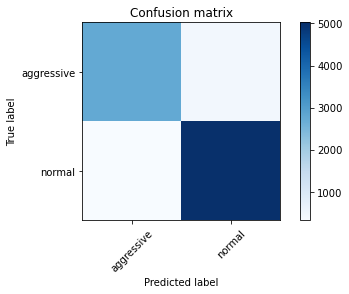

In [218]:
# Compute confusion matrix
cm = confusion_matrix(agg_y_day10, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

# Agg Logistic Regression Train One Day AND Test The Rest

In [219]:
#day 1 tweets training
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_y_day1 = agg_day1_tweets["Label"].values
agg_lr = LogisticRegression(verbose = 2, warm_start = True)
agg_lr = agg_lr.fit(agg_x_day1, agg_y_day1)

In [220]:
#day 2 tweets testing
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
agg_y_day2 = agg_day2_tweets["Label"].values
pred = agg_lr.predict(agg_x_day2)
print(metrics.classification_report(agg_y_day2, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3236
           1       0.92      0.94      0.93      5340

    accuracy                           0.91      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.91      0.91      0.91      8576



In [221]:
#day 3 tweets testing
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
agg_y_day3 = agg_day3_tweets["Label"].values
pred = agg_lr.predict(agg_x_day3)
print(metrics.classification_report(agg_y_day3, pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3219
           1       0.92      0.93      0.92      5357

    accuracy                           0.90      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.90      0.90      0.90      8576



In [222]:
#day 4 tweets testing
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
agg_y_day4 = agg_day4_tweets["Label"].values
pred = agg_lr.predict(agg_x_day4)
print(metrics.classification_report(agg_y_day4, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3183
           1       0.93      0.94      0.93      5393

    accuracy                           0.91      8576
   macro avg       0.91      0.91      0.91      8576
weighted avg       0.91      0.91      0.91      8576



In [223]:
#day 5 tweets testing
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
agg_y_day5 = agg_day5_tweets["Label"].values
pred = agg_lr.predict(agg_x_day5)
print(metrics.classification_report(agg_y_day5, pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3282
           1       0.92      0.94      0.93      5293

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [224]:
#day 6 tweets testing
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
agg_y_day6 = agg_day6_tweets["Label"].values
pred = agg_lr.predict(agg_x_day6)
print(metrics.classification_report(agg_y_day6, pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3162
           1       0.92      0.94      0.93      5413

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [225]:
#day 7 tweets testing
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
agg_y_day7 = agg_day7_tweets["Label"].values
pred = agg_lr.predict(agg_x_day7)
print(metrics.classification_report(agg_y_day7, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3140
           1       0.92      0.94      0.93      5435

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [226]:
#day 8 tweets testing
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
agg_y_day8 = agg_day8_tweets["Label"].values
pred = agg_lr.predict(agg_x_day8)
print(metrics.classification_report(agg_y_day8, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3275
           1       0.91      0.94      0.93      5300

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [227]:
#day 9 tweets testing
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
agg_y_day9 = agg_day9_tweets["Label"].values
pred = agg_lr.predict(agg_x_day9)
print(metrics.classification_report(agg_y_day9, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3175
           1       0.92      0.94      0.93      5400

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [228]:
#day 10 tweets testing
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
agg_y_day10 = agg_day10_tweets["Label"].values
pred = agg_lr.predict(agg_x_day10)
print(metrics.classification_report(agg_y_day10, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3229
           1       0.92      0.94      0.93      5346

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



[[2788  441]
 [ 327 5019]]


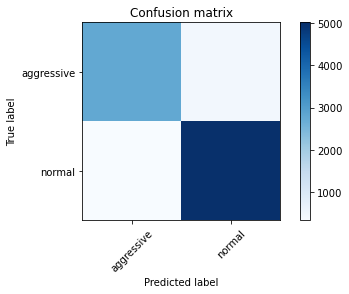

In [229]:
# Compute confusion matrix
cm = confusion_matrix(agg_y_day10, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()